PROJECT SCOPES:

Initial:
- Perform initial dataset cleaning

Inspection:
1. Which national park has the highest number of animals?
2. Find out the top 10 animals with the highest presence among all parks.
3. Which category of animals appear the most in the parks?

Final:
- Provide a report.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
colors2 = ["#A8DADC", "#F4A261", "#F6BD60", "#84A59D", "#E5989B", "#B4C6A6", "#FFD6A5", "#D4A5A5", "#B9CCED", "#DAB894"]

First hands-on with the datasets:

In [2]:
species_info = pd.read_csv("species_info.csv")
print(species_info.info)

<bound method DataFrame.info of             category                scientific_name  \
0             Mammal  Clethrionomys gapperi gapperi   
1             Mammal                      Bos bison   
2             Mammal                     Bos taurus   
3             Mammal                     Ovis aries   
4             Mammal                 Cervus elaphus   
...              ...                            ...   
5819  Vascular Plant               Solanum parishii   
5820  Vascular Plant                  Solanum xanti   
5821  Vascular Plant         Parthenocissus vitacea   
5822  Vascular Plant              Vitis californica   
5823  Vascular Plant            Tribulus terrestris   

                                           common_names conservation_status  
0                              Gapper's Red-Backed Vole                 NaN  
1                                 American Bison, Bison                 NaN  
2     Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 N

In [3]:
observations = pd.read_csv("observations.csv")
print(observations.head())

            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85


POINT 1: BASIC DATASET CLEANING

In [4]:
#Dataset cleaning for species_info.csv
print("Missing value counts for species_info.csv")
for col in species_info.columns:
    print(f"{col}: {(species_info[col].isna().sum()/5824)*100}%")
    if (species_info[col].isna().sum()/5824)*100 > 60:
        del species_info[col]
species_info.category = pd.Categorical(species_info.category)


#Dataset cleaning for observaitons.csv
print("\nMissing value counts for observations.csv")
for col in observations.columns:
    print(f"{col}: {(observations[col].isna().sum()/5824)*100}%")
    if (observations[col].isna().sum()/5824)*100 > 60:
        del observations[col]


Missing value counts for species_info.csv
category: 0.0%
scientific_name: 0.0%
common_names: 0.0%
conservation_status: 96.72046703296702%

Missing value counts for observations.csv
scientific_name: 0.0%
park_name: 0.0%
observations: 0.0%


INSPECTION POINT 1: Which national park has the highest number of animals?

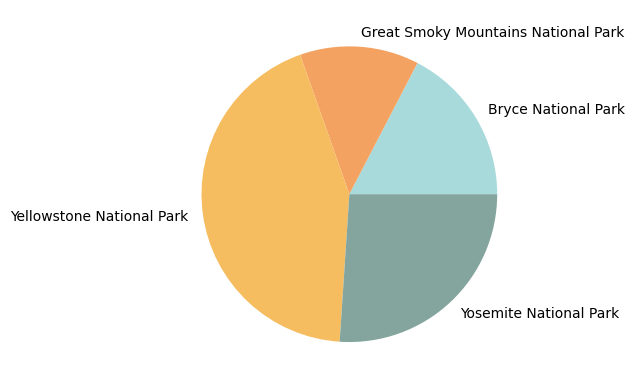

In [5]:
park_animal_counts = observations.observations.groupby(observations.park_name).sum().reset_index()
plt.pie(park_animal_counts.observations, labels=list(park_animal_counts.park_name.unique()), colors=colors2)
plt.show()

INSPECTION POINT 2: What are the top 10 animals with the highest presence among all parks.

/var/folders/2z/c0vlbc051p358_h97n3k8g340000gn/T/ipykernel_14472/3961319707.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_animals.scientific_name, x=top_animals.observations, palette=colors2, order=top_animals.scientific_name)


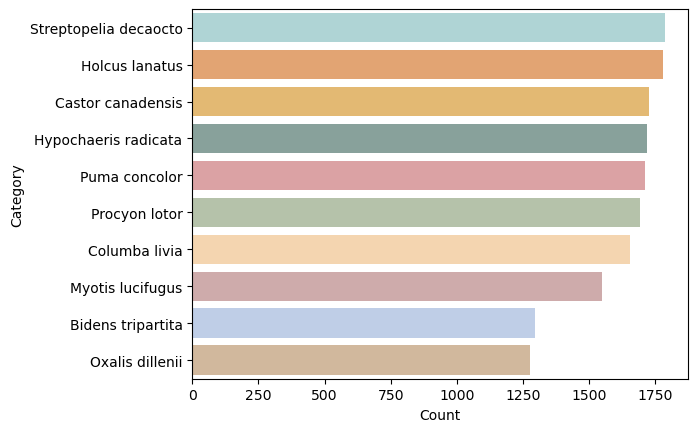

In [25]:
top_animals = observations.observations.groupby(observations.scientific_name).sum().reset_index().sort_values(by="observations", ascending=False).head(10)
sns.barplot(y=top_animals.scientific_name, x=top_animals.observations, palette=colors2, order=top_animals.scientific_name)
plt.xlabel("Count")
plt.ylabel("Category")
plt.show()

INSPECTION POINT 3: Which category of animals appear the most?

/var/folders/2z/c0vlbc051p358_h97n3k8g340000gn/T/ipykernel_14472/1998258975.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  categories_count = species_info.category.groupby(species_info.category).count().sort_values(ascending=False)
/var/folders/2z/c0vlbc051p358_h97n3k8g340000gn/T/ipykernel_14472/1998258975.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=categories_count.index, x=categories_count, palette=colors2, order=categories_count.index)
/var/folders/2z/c0vlbc051p358_h97n3k8g340000gn/T/ipykernel_14472/1998258975.py:2: UserWarning: The palette list has more values (10) than needed (7), which may not be intended.
  sns.barplot(y=catego

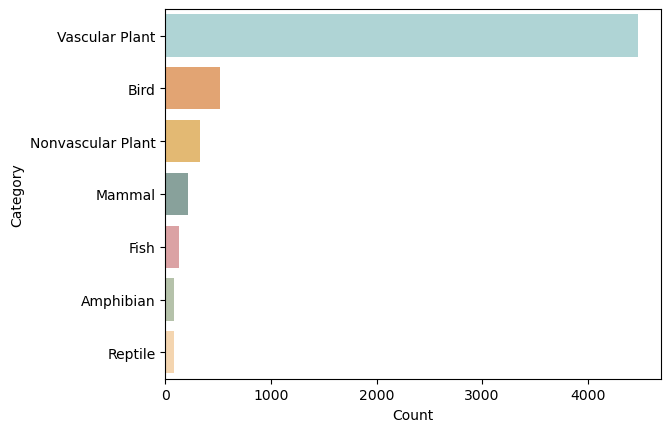

In [26]:
categories_count = species_info.category.groupby(species_info.category).count().sort_values(ascending=False)
sns.barplot(y=categories_count.index, x=categories_count, palette=colors2, order=categories_count.index)
plt.xlabel("Count")
plt.ylabel("Category")
plt.show()

RESULTS:

 - The park with the highest nubmer of animals is the Yellowstone National Park;
 - The species most occuring in the parks is Streptopelia decaocto;
 - The most occuring animal category are Vascular Plants.